<a href="https://colab.research.google.com/github/ismail-memon-123/CS_5262_ML/blob/main/ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vanderbilt CS 5262 Foundations of ML Project

###Background



```
```

This project involves applying machine learning (ML) techniques to analyze and predict the outcomes of marketing campaigns using a dataset provided by the University of California, Irvine (UCI). The dataset can be accessed at the following link: https://archive.ics.uci.edu/dataset/222/bank+marketing. This dataset contains detailed information on marketing calls conducted by a bank in Portugal, where the telemarketing team aimed to encourage potential customers to subscribe to a term deposit. The data consists of various attributes related to the marketing calls, such as the type of contact, duration of the call, and the timing of the calls, as well as personal characteristics of the customers, such as age, job type, marital status, education level, and financial situation. The dataset also includes the target variable indicating whether or not the customer subscribed to the term deposit following the marketing interaction. Given that the bank made many different attempts to various demographics of individuals and did so at different times of the week, to contact many individuals, the dataset captures both successful and unsuccessful outcomes of these interactions.

###Project Description

This project involves building and evaluating a machine learning (ML) model using the Python programming language. To facilitate the analysis, common data science libraries and packages, such as NumPy, pandas, Scikit-learn, and Matplotlib, will be utilized. The first step will involve an exploratory data analysis (EDA), where the dataset will be carefully examined to understand its structure, detect any missing or inconsistent data, along with feature engineering to allow the data to contain a more effective set of inputs, with the end goal being to faciliate the machine learning model. After cleaning and preprocessing the data, it will be divided into a training set and a test set. The training set will be used to train the ML model, while the test set will allow for an unbiased evaluation of the model's performance on unseen data. The core objective of this project is to predict whether a customer will subscribe to the term deposit based on the features available in the dataset. These features include attributes such as the day of the week the call was made, the duration of the call, the customer's age, job type, marital status, and whether they have previously been contacted by the bank. By feeding this data into a machine learning algorithm, we aim to develop a predictive model that can identify patterns in the marketing campaign’s success rates, which could be useful for the bank’s future telemarketing strategies. Various machine learning algorithms will be tested, such as logistic regression, neural networks, etc. Each of the models' performance and accuracy will be evaluated and compared.

###Performance Metric

The performance of the machine learning model will be evaluated based on its ability to accurately predict whether an individual will subscribe to the term deposit. The primary metric for performance will be classification accuracy, which measures the percentage of correct predictions made by the model on the test data. However, additional evaluation metrics such as precision, recall, etc. will also be considered to provide a more comprehensive assessment of the model's effectiveness, especially in imbalanced datasets where one class (e.g., not subscribing) may dominate the other. The model's performance will be evaluated using the test set, which contains data that the model has not encountered during training. This will help assess the generalizability of the model and how well it performs when exposed to new, unseen data. By the end of this project, the goal is to develop a model that provides meaningful insights into the factors that influence customer subscription behavior and can serve as a valuable tool for improving the bank's marketing strategy.

##Explatory Data Analysis
The following sections will do some initial EDA on the dataset.

In [1]:
# tables and visualizations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data from csv file 'bank-full.csv'

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ismail-memon-123/CS_5262_ML/refs/heads/main/bank-full.csv',delimiter=';')
display(data.head(20))
data.info()
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


###Questions

###Question 1: What is the relationship between previous (number of contacts performed before), job, and balance to the outcome of subscribing a deposit? Create a different graph for each and encode the outcome as 1 for a yes to the subscription of a deposit and 0 for a no.

<Axes: xlabel='previous', ylabel='binary_result'>

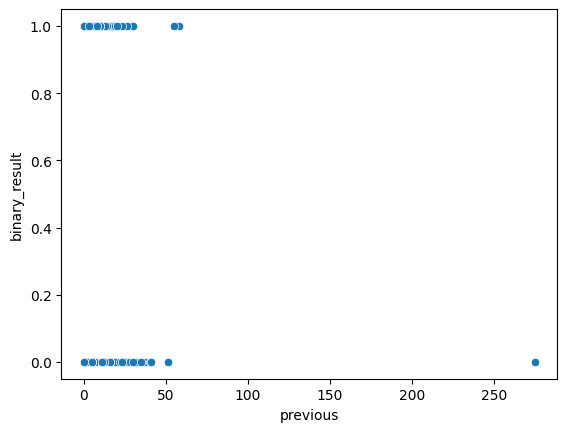

In [4]:
# convert yes to 1 and no to 0
data['y'].value_counts()
data['binary_result'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else 2)
data['binary_result'].value_counts()

#plot the various plots
#first is previous vs the y
sns.scatterplot(x='previous', y='binary_result', data=data)

<Axes: xlabel='balance', ylabel='binary_result'>

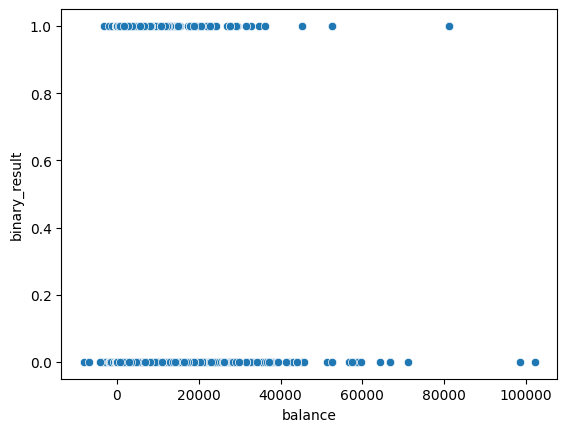

In [5]:
#second is balance vs the y
sns.scatterplot(x='balance', y='binary_result', data=data)

<Axes: xlabel='job', ylabel='binary_result'>

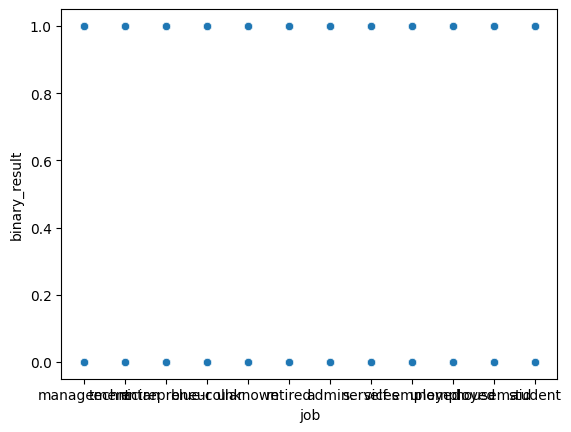

In [6]:
#third is job vs the y
sns.scatterplot(x='job', y='binary_result', data=data)

Answer: It seems like all 3 of the graphed quantities have no disctint correlation with a yes/no. For each of the categories and values of the quantity (type of job, balance, previous contacts) there were both results of yes or no.

###Question 2: How Skewed is our Data? Do we have a sufficient distribution of yes and no to the final outcome column?

In [7]:
# count the number of yes and no in final column
data['y'].value_counts()

print("Percentage of data is: ")
print(data['y'].value_counts(normalize=True))

Percentage of data is: 
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


Answer: Data is quite skewed almost 8 times the number of 'no' answers as 'yes'

###Question 3: Are certain months of the year more prone to get a deposit (yes outcome) and more prone for calls to be made? Plot a graph and explain.

In [8]:
data['month'].value_counts()
#May was the most common month contacted.

,count
month,
may,13766
jul,6895
aug,6247
jun,5341
nov,3970
apr,2932
feb,2649
jan,1403
oct,738


<Axes: xlabel='month', ylabel='binary_result'>

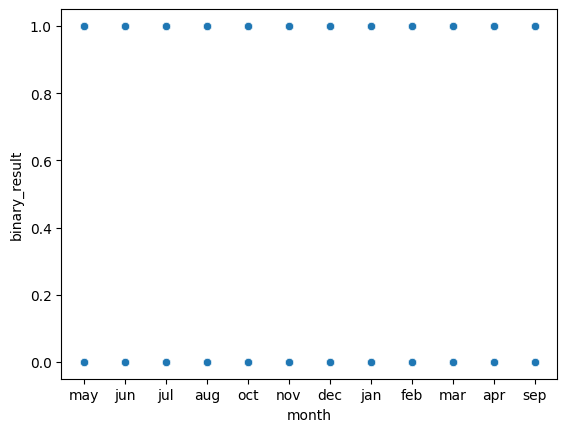

In [9]:
sns.scatterplot(x='month', y='binary_result', data=data)

In [10]:
# Lets see in each month what proportion is a yes and what proportion is a no.
data.groupby('month')['binary_result'].value_counts(normalize=True)

month  binary_result
apr    0                0.803206
       1                0.196794
aug    0                0.889867
       1                0.110133
dec    0                0.532710
       1                0.467290
feb    0                0.833522
       1                0.166478
jan    0                0.898788
       1                0.101212
jul    0                0.909065
       1                0.090935
jun    0                0.897772
       1                0.102228
mar    1                0.519916
       0                0.480084
may    0                0.932805
       1                0.067195
nov    0                0.898489
       1                0.101511
oct    0                0.562331
       1                0.437669
sep    0                0.535406
       1                0.464594
Name: proportion, dtype: float64

Answer: Certain months are way more prone to receiving a yes than a no. March, Decemer, September, October got way more yes's in proportion to no's than the rest of the months.

###Question 4: What initial feature engineering would you perform?

I think that since the day of the week is just a number and it does not correspond to like the day (Monday, Tuesday, etc.) it adds too much variability to what we already have (the month). So I think that column should be omitted and so should the yes or no column (column 'y') as we have already one hot encoded it. It may also make sense to divide balance into four quartiles otherwise there are too many numbers.

In [11]:
# Remove day column and the yes column
data = data.drop(['day', 'y'], axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,binary_result
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,unknown,0


In [12]:
# Categorize balance into four quartiles (based on median and then encode to 0, 1, 2, or 3)
data['balance'] = pd.qcut(data['balance'], q=4, labels=False)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,binary_result
0,58,management,married,tertiary,no,3,yes,no,unknown,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,0,yes,no,unknown,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,0,yes,yes,unknown,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,3,yes,no,unknown,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,0,no,no,unknown,may,198,1,-1,0,unknown,0


Answer: Dropped the yes and date column because the yes already had a binary encoding and the date of the month had too many erratic values. Also divided the balance into quartiles so that it could be categorized.

###Question 5: There are a lot of Unknown Values in the Categorical Questions? Can we drop them, if so how much data are we omitting by dropping those rows?

In [13]:
# if any row has 'unknown' in it drop it
data_clean = data[(data != "unknown").all(axis=1)]
data_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,binary_result
24060,33,admin.,married,tertiary,no,2,no,no,telephone,oct,39,1,151,3,failure,0
24062,42,admin.,single,secondary,no,0,yes,yes,telephone,oct,519,1,166,1,other,1
24064,33,services,married,secondary,no,3,yes,no,telephone,oct,144,1,91,4,failure,1
24072,36,management,married,tertiary,no,3,yes,no,telephone,oct,73,1,86,4,other,0
24077,36,management,married,tertiary,no,0,yes,no,telephone,oct,140,1,143,3,failure,1


In [14]:
print('# of rows of original dataframe: ', len(data))
print('# of rows of new dataframe after dropping missing data: ', len(data_clean))

# of rows of original dataframe:  45211
# of rows of new dataframe after dropping missing data:  7842


Answer: That was not a good idea, we cannot drop such data otherwise we are left with a tiny fraction of the data.

##Summary of EDA:

Question 1 Answer: It seems like all 3 of the graphed quantities have no disctint correlation with a yes/no. For each of the categories and values of the quantity (type of job, balance, previous contacts) there were both results of yes or no.

Question 2 Answer: Data is quite skewed almost 8 times the number of 'no' answers as 'yes'.

Question 3 Answer: Certain months are way more prone to receiving a yes than a no. March, Decemer, September, October got way more yes's in proportion to no's than the rest of the months.

Question 4 Answer: Dropped the yes and date column because the yes already had a binary encoding and the date of the month had too many erratic values. Also divided the balance into quartiles so that it could be categorized.

Question 5 Answer: That was not a good idea, we cannot drop such data otherwise we are left with a tiny fraction of the data.

#Heading Towards the Pipeline

##Feature Engineering

After the initial feature engineering that I completed in the EDA, I believe that is a good start. I quartiled the income, which led to a more categorical value for that. I should also do something similar with age. There is also a pdays column is the number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted). That may need some fixing because the -1 may skew the model since its not really -1 its more of invalid.

##Train-Test Split

My plan was to have a 75-25 percent train/test data split. I am not planning to have a golden holdout set. Since my data is skewed (way more no's then yes) I need to stratify so that I have the same distribution of yes' and no's as in the orignal set for both the train and test set.

##Initial Pipeline

All of the categorical types of data will need a one hot encoding and we will need to make sure that the number of the encoding does not add weight and make the model think it is 'more important.' For a lot of categorical data there are unknown values and it is not allowed to drop those because that would significantly reduce our data set so imputations must be performed for those.

##Model Fitting and Evaluation

My three assumptions are:

Balance (level of income) has a lot to do with whether a deposit will be made, and this goes hand in hand with credit history (existence of loans and defaults) because this is an indicator of affluence (more or less) and my assumption is that more affluent individuals are more likely to subscribe a deposit as they have the funds.

Previous contact will have an effect on whether there is a yes or no outcome, however it depends on how, when, and how many times they were previously contacted. I think that when we are repeatedly targeted with ad campaings or marketing we are more likely to give in, but if we were approached in an inconvenient time or almost nagged, it will make us less likely to purhcase, subscribe, etc.

Lastly, I have some reservations about the performance of the model. Since there are so many different parameters and so few success outcomes, I am worried that the model will not be as accurate and reliable as hoped, and if we had more successful outcomes.

#EDA Continued Assignment 4

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,binary_result
0,58,management,married,tertiary,no,3,yes,no,unknown,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,0,yes,no,unknown,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,0,yes,yes,unknown,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,3,yes,no,unknown,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,0,no,no,unknown,may,198,1,-1,0,unknown,0


<Axes: xlabel='age', ylabel='binary_result'>

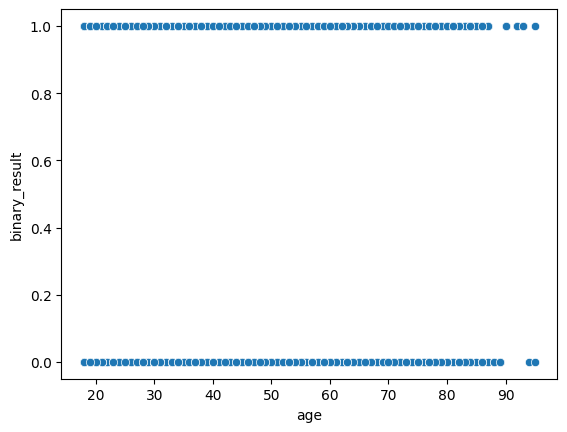

In [16]:
sns.scatterplot(x='age', y='binary_result', data=data)

As we can see, the data has a wide variety of ages, so I will divide that into quartiles (like the balance) so that we have four groups instead of way too many numbers.

In [17]:
# Categorize age into four quartiles (based on median and then encode to 0, 1, 2, or 3)
data['age'] = pd.qcut(data['age'], q=4, labels=False)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,binary_result
0,3,management,married,tertiary,no,3,yes,no,unknown,may,261,1,-1,0,unknown,0
1,2,technician,single,secondary,no,0,yes,no,unknown,may,151,1,-1,0,unknown,0
2,0,entrepreneur,married,secondary,no,0,yes,yes,unknown,may,76,1,-1,0,unknown,0
3,2,blue-collar,married,unknown,no,3,yes,no,unknown,may,92,1,-1,0,unknown,0
4,0,unknown,single,unknown,no,0,no,no,unknown,may,198,1,-1,0,unknown,0


The summary of the EDA was that firstly, I had to make the yes/no result column into a binary. Secondly, the age and the balance columns are containing of a range of numbers since it represents age and income, so I consolidated those into four quartiles. That way we can still see the correlation and categories of low-income vs high income, young vs old, etc. but we don't need to complicate the model by having so many numbers present. Thirdly, the date column was very erratic because the month was already represented and having the date did not tell us anything about what day it was so it is basically just a number with no real meaning, so we dropped that. There are negative values in the pdays column, which I initially though are a bad idea to have, but it seems like they are not an issue.

However, these modifications MUST happen after the train/test split because we don't want leakage.

#Feature Engineering

In [18]:
# Final list of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45211 non-null  int64 
 1   job            45211 non-null  object
 2   marital        45211 non-null  object
 3   education      45211 non-null  object
 4   default        45211 non-null  object
 5   balance        45211 non-null  int64 
 6   housing        45211 non-null  object
 7   loan           45211 non-null  object
 8   contact        45211 non-null  object
 9   month          45211 non-null  object
 10  duration       45211 non-null  int64 
 11  campaign       45211 non-null  int64 
 12  pdays          45211 non-null  int64 
 13  previous       45211 non-null  int64 
 14  poutcome       45211 non-null  object
 15  binary_result  45211 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [19]:
data.describe()

,age,balance,duration,campaign,pdays,previous,binary_result
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1.441353,1.499502,258.163080,2.763841,40.197828,0.580323,0.116985
std,1.149028,1.118214,257.527812,3.098021,100.128746,2.303441,0.321406
min,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,1.000000,1.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,2.000000,2.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,3.000000,3.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


#ML Pipeline

Plan of Action:
All of the categorical types of data will need a one hot encoding and we will need to make sure that the number of the encoding does not add weight and make the model think it is 'more important.' For a lot of categorical data there are unknown values and it is not allowed to drop those because that would significantly reduce our data set so imputations must be performed for those. And also, the train/test split. Will start again with the data.

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/ismail-memon-123/CS_5262_ML/refs/heads/main/bank-full.csv',delimiter=';')
data['binary_result'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else 2)
# Remove day column and the yes column
data = data.drop(['day', 'y'], axis=1)
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,binary_result
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,-1,0,unknown,0


In [21]:
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler, KBinsDiscretizer
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [22]:
random_seed = 1234
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns='binary_result'), data['binary_result'],
                                                   test_size=0.25, random_state=random_seed, stratify=data['binary_result'])

In [23]:
# X Train
print('On X train: ')
print('X train dimensions: ', x_train.shape)
display(x_train.head())

# X test
print('\nOn X test: ')
print('X test dimensions: ', x_test.shape)
display(x_test.head())

On X train: 
X train dimensions:  (33908, 15)


,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
42975,60,retired,married,secondary,no,1853,no,no,cellular,feb,234,1,183,1,success
12885,57,retired,married,secondary,no,-37,no,yes,cellular,jul,354,1,-1,0,unknown
21208,35,management,single,tertiary,no,51,no,no,cellular,aug,90,5,-1,0,unknown
40966,69,housemaid,single,unknown,no,2493,no,no,cellular,aug,368,1,-1,0,unknown
35143,26,student,single,secondary,no,502,yes,no,telephone,may,82,1,-1,0,unknown



On X test: 
X test dimensions:  (11303, 15)


,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
850,36,services,single,secondary,no,342,yes,no,unknown,may,142,1,-1,0,unknown
28094,35,technician,married,secondary,no,2,no,no,telephone,jan,653,3,-1,0,unknown
18593,44,unknown,married,unknown,no,1317,no,no,telephone,jul,444,6,-1,0,unknown
9605,47,unknown,married,unknown,no,0,no,no,unknown,jun,466,2,-1,0,unknown
39208,30,retired,single,secondary,no,48,no,no,cellular,may,142,2,300,1,other


In [24]:
# First make all the values with Unknown n/a so its easy to impute them
data = data.replace('unknown', np.nan)
data.head()
data.isna().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
month,0


In [25]:
# We need 2 imputations, categorical and numerical, and then the quartiling which is also part of the pipeline
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                               ('onehot_cat', OneHotEncoder())])

num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(strategy='mean')),
                               ('scale_num', StandardScaler())])
quartile_transformer = Pipeline(steps=[
    ('discretizer', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')), ('onehot_cat', OneHotEncoder())
])

In [26]:
# 3 - now we establish preprocessing pipe by columns
# TODO: discuss with your team which columns should be in cat_cols vs num_cols
# 7 categories in number -> so we end up with 6 columns each containing 0/1
# number 1, number 2, number 3, ... number 6
# 0, 0, 0, 0, 0, 0
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
quartile_cols = ['age', 'balance']

preproc = ColumnTransformer([('cat_pipe', cat_pipeline, cat_cols),
                             ('num_pipe', num_pipeline, num_cols),
                             ('discretizer', quartile_transformer, quartile_cols)],
                             remainder='passthrough')

In [27]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,binary_result
0,58,management,married,tertiary,no,2143,yes,no,NaN,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,may,198,1,-1,0,NaN,0


In [28]:
pipe = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01, l1_ratio=0.5))])

# visualization of the pipeline
with config_context(display='diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('discretizer',
                                                  Pipeline(steps=[('discretizer',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=4)),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['age', 'balance'])])),
                ('mdl',
                 LogisticRegression(l1_ratio=0.5, penalty='elasticnet',
                                    solver='saga', tol=0.01))])

In [29]:
pipe.fit(x_train, y_train.values.ravel())

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('discretizer',
                                                  Pipeline(steps=[('discretizer',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=4)),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['age', 'balance'])])),
                ('mdl',
                 LogisticRegression(l1_ratio=0.5, penalty='elasticnet',
                                    solver='saga', tol=0.01))])

Will now evaluate performance.

In [30]:
y_pred = pipe.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.90


In [31]:
precision = precision_score(y_test, y_pred, average='binary')  # Options: 'micro', 'macro', 'weighted'
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Model Precision: {precision:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model F1 score: {f1:.2f}")

Model Precision: 0.65
Model Recall: 0.33
Model F1 score: 0.44


In [32]:
print(classification_report(y_test, pipe.predict(x_test))) # prediction on test set

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9981
           1       0.65      0.33      0.44      1322

    accuracy                           0.90     11303
   macro avg       0.79      0.66      0.69     11303
weighted avg       0.89      0.90      0.89     11303



Cross Validation with HyperParameter Tuning

In [33]:
# 5 - we will use the pipeline for cross validation and hyperparameter tuning
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }

# y = f1(x): f1 = 1.2x1 + 2.5x2 + 3.1x3 + 10
# y = f2(x): f2 = -1.2x1 + 0.5x2 + 3.1x3 + 10
# TODO: choose your cv folds
grid_search = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score=True, n_jobs=-1)

In [34]:
grid_search.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[('impute...
                                                                         Pipeline(steps=[('discretizer',
                                                                                          KBinsDiscretizer(encode='ordinal',
                                                                                                           n_bins=4)),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         ['age',
                                                                          'balance'])])),
                                       ('mdl',
                                        LogisticRegression(l1_ratio=0.5,
                                                           penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             n_jobs=-1,
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [35]:
print(grid_search.best_score_)
grid_search.best_params_

0.9013211755172603


{'mdl__C': 316.22776601683796, 'mdl__l1_ratio': 0.0}

In [36]:
pipe_with_tuning = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', C=316.2278, tol=0.01, l1_ratio=0.5))])


In [37]:
grid_search.best_estimator_

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('discretizer',
                                                  Pipeline(steps=[('discretizer',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=4)),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['age', 'balance'])])),
                ('mdl',
                 LogisticRegression(C=316.22776601683796, l1_ratio=0.0,
                                    penalty='elasticnet', solver='saga',
                                    tol=0.01))])

In [38]:
# Printing our target classes
grid_search.classes_

array([0, 1])

In [39]:
# Get the weights of our features used in the best model (estimator)
coefs = grid_search.best_estimator_['mdl'].coef_[0]
coefs

array([ 0.10632525, -0.24507112, -0.15340182, -0.40846773, -0.039003  ,
        0.136788  , -0.20032699, -0.11735168,  0.54855449, -0.05495321,
       -0.1323724 , -0.06713409, -0.20092565, -0.3107592 , -0.11472944,
       -0.33740344, -0.15332356,  0.04552862, -0.1812159 , -0.42622524,
       -0.20018905,  0.01688032, -0.6432946 , -0.09903157, -0.52738272,
        0.36266772,  0.17227046, -1.16135247, -0.05453802, -0.69865684,
        0.32210065, -0.19933628, -1.1416242 , -0.77310047,  0.27813973,
        1.38356874, -0.41151705, -0.83605823,  0.73651999,  0.76808769,
       -0.77069324, -0.60305621,  1.48562837, -0.73829321,  0.2205205 ,
       -0.0393583 ,  1.06952022, -0.26874862,  0.03362894,  0.04866793,
        0.21929572, -0.10403766, -0.31044568, -0.43122667, -0.43618731,
       -0.13089993, -0.1600505 ,  0.10072346])

In [40]:
grid_search.best_estimator_.named_steps['preproc'].transformers_

[('cat_pipe',
  Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                  ('onehot_cat', OneHotEncoder())]),
  ['job',
   'marital',
   'education',
   'default',
   'housing',
   'loan',
   'contact',
   'month',
   'poutcome']),
 ('num_pipe',
  Pipeline(steps=[('impute_num', SimpleImputer()),
                  ('scale_num', StandardScaler())]),
  ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']),
 ('discretizer',
  Pipeline(steps=[('discretizer', KBinsDiscretizer(encode='ordinal', n_bins=4)),
                  ('onehot_cat', OneHotEncoder())]),
  ['age', 'balance'])]

In [41]:
grid_search.best_estimator_.fit(x_train, y_train.values.ravel())
print(classification_report(y_test, grid_search.best_estimator_.predict(x_test))) # prediction on test set

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9981
           1       0.65      0.34      0.44      1322

    accuracy                           0.90     11303
   macro avg       0.79      0.66      0.69     11303
weighted avg       0.89      0.90      0.89     11303



Result: We can see that there are some minor changes in the performance metrics after the hyper parameter tuning.

#Hyper Parameter Tuning
For assignment 5, I will use grid search for the hyper paramter tuning.

I will be using four models: Logistic regression, random forests, xg boost, and decision trees. Each of these will have a pipeline and will have hyperparameter tuning to find the best that the model can perform, and then I will report on the metrics for model success.

##Model 1: Logistic Regression

In [42]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [43]:
##Model 1: Logistic Regression

pipe_log_reg = Pipeline(steps=[('preproc', preproc),
                       ('mdl', LogisticRegression(penalty='elasticnet', solver='saga', tol=0.01))])

#
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }

grid_search = GridSearchCV(pipe_log_reg, param_grid = tuning_grid, cv = 5, return_train_score=True, n_jobs=-1)
grid_search.fit(x_train, y_train.values.ravel())

grid_search.best_estimator_.fit(x_train, y_train.values.ravel())
print(classification_report(y_test, grid_search.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9981
           1       0.65      0.34      0.44      1322

    accuracy                           0.90     11303
   macro avg       0.79      0.66      0.69     11303
weighted avg       0.89      0.90      0.89     11303



In [44]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
## Random forests
pipe_rand_forest = Pipeline(steps=[('preproc', preproc),
                       ('mdl_forest', RandomForestClassifier())])
param_grid = {
    'mdl_forest__n_estimators': [5,10,50],
    'mdl_forest__min_samples_split': [2, 5, 10],
}

grid_search_forest = GridSearchCV(estimator=pipe_rand_forest, param_grid=param_grid, return_train_score=True, cv=5, n_jobs=-1)
grid_search_forest.fit(x_train, y_train.values.ravel())

grid_search_forest.best_estimator_.fit(x_train, y_train.values.ravel())
print(classification_report(y_test, grid_search_forest.best_estimator_.predict(x_test)))



              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9981
           1       0.66      0.34      0.45      1322

    accuracy                           0.90     11303
   macro avg       0.79      0.66      0.70     11303
weighted avg       0.89      0.90      0.89     11303



In [55]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
## Decision Tree
pipe_dt = Pipeline(steps=[('preproc', preproc),
                       ('mdl_dt', DecisionTreeClassifier(random_state=random_seed))])
param_grid = {
    'mdl_dt__max_depth': [10,50, 100],
    'mdl_dt__min_samples_leaf': [3, 4, 5, 6, 7, 10],
    'mdl_dt__splitter':['best', 'random']
}

grid_search_dt = GridSearchCV(estimator=pipe_dt, param_grid=param_grid, return_train_score=True, cv=5, n_jobs=-1)
grid_search_dt.fit(x_train, y_train.values.ravel())

grid_search_dt.best_estimator_.fit(x_train, y_train.values.ravel())
print(classification_report(y_test, grid_search_dt.best_estimator_.predict(x_test)))



              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9981
           1       0.60      0.38      0.46      1322

    accuracy                           0.90     11303
   macro avg       0.76      0.67      0.70     11303
weighted avg       0.88      0.90      0.89     11303



In [67]:
from xgboost import XGBClassifier

In [69]:
## XG Boost
pipe_gb = Pipeline(steps=[('preproc', preproc),
                       ('mdl_gb', XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=random_seed))])
param_grid = {
    "mdl_gb__n_estimators": [10, 50],
    "mdl_gb__learning_rate": [0.01, 0.1, 0.2],
    "mdl_gb__max_depth": [5, 10],
    "mdl_gb__min_samples_split": [2, 5, 10]
}

grid_search_gb = GridSearchCV(estimator=pipe_gb, param_grid=param_grid, return_train_score=True, cv=5, n_jobs=-1)
grid_search_gb.fit(x_train, y_train.values.ravel())

grid_search_gb.best_estimator_.fit(x_train, y_train.values.ravel())
print(classification_report(y_test, grid_search_gb.best_estimator_.predict(x_test)))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9981
           1       0.64      0.42      0.51      1322

    accuracy                           0.90     11303
   macro avg       0.78      0.70      0.73     11303
weighted avg       0.89      0.90      0.90     11303



##Results

Based on the classification reports, XG Boost performed slightly better than all of the models. That tells me mostly that the data is complex, non linear, and imbalanced (which I know it is). That matched the intuition I had about the data. Due to the unbalanced nature of the data, I thought that a model like XGB or a tree model would be better suited than a regression model. I believe the reason for that may be that the relationship is more of a decision tree type. What I mean by that is that since this is based on whether the individual made a deposit, I imagined for the model to behave based on a few features. Such as whether the person was financially well off (they had the means to make a deposit), what time they were called (so not to disturb them), what age they were. It seemed more likely that these types of decisions compounded each other and the result almost seemed like a tree of different decision points. For that reason, I had an intuitive guess that the forest, xg boost (because it also focuses on feature interactions), or tree based model would be best. Decision trees were a bit overfitted, but the one thing to note is that most of the models performed similar to each other, which tells me that there is kind of a flattening point with gains using different models. It also means that the data has more or less clearer patterns that multiple models can see and effectively work on. For the business side, that means that the computing cost of the model will really affect decisions, since using the more expensive models did not yield drastic results. It also kind of emphasizes what we learned that feature engineering is usually a bigger factor than the model used. The top two models were random forest and XG Boost, followed my logistic regression and decision trees.